### Do your imports!

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

import numpy as np

# 311 data analysis

## Read in `subset.csv` and review the first few rows

Even though it's a giant file – gigs and gigs! – it's a subset of the [entire dataset](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). It covers plenty of years, but not all of the columns.

If your computer is struggling (which it will!) or you are impatient, feel free to use `nrows=` when reading it in to speed up the process by only reading in a subset of columns. Pull in at least a few million, or a couple years back.

In [49]:
df = pd.read_csv("subset.csv",
                   nrows = 3000000) # Add more rows later
df.head()

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Address Type,City,Status,Borough,Open Data Channel Type
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Development,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Development,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE


### Where the subset came from

If you're curious, I took the [original data](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data) and clipped out a subset by using the command-line tool [csvkit](https://csvkit.readthedocs.io/en/latest/).

First I inspected the column headers:

```bash
$ csvcut -n 311_Service_Requests_from_2010_to_Present.csv 
```

Then I selected the columns I was interested in and saved it to a file.

```bash
$ csvcut -c 1,2,3,4,5,6,7,8,9,10,16,17,20,26,29 311_Service_Requests_from_2010_to_Present.csv > subset.csv
```

This was much much much much faster than doing it in Python.

## We want more columns!

**Right now we don't see all of the columns.** For example, mine has `...` between the **Incident Address** column and the **City** column. Go up to the top where you imported pandas, and add a `pd.set_option` line that will allow you to view all of the columns of the dataset.

## We hate those column names!

Change the column names to be tab- and period-friendly, like `df.created_date` instead of `df['Created Date']`

In [51]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Development,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Development,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,22434857,01/02/2012 12:00:00 AM,01/05/2012 12:00:00 AM,HPD,Department of Housing Preservation and Development,GENERAL CONSTRUCTION,WINDOWS,RESIDENTIAL BUILDING,11217.0,36 3 AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,UNKNOWN
2999996,22434224,01/02/2012 12:00:00 AM,01/11/2012 12:00:00 AM,HPD,Department of Housing Preservation and Development,GENERAL CONSTRUCTION,FLOOR,RESIDENTIAL BUILDING,10034.0,248 SHERMAN AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,UNKNOWN
2999997,22434722,01/02/2012 12:00:00 AM,01/15/2012 12:00:00 AM,HPD,Department of Housing Preservation and Development,GENERAL CONSTRUCTION,DOORS,RESIDENTIAL BUILDING,11216.0,762 LINCOLN PLACE,ADDRESS,BROOKLYN,Closed,BROOKLYN,UNKNOWN
2999998,22432734,01/02/2012 12:00:00 AM,01/03/2012 12:00:00 AM,HPD,Department of Housing Preservation and Development,HEATING,HEAT,RESIDENTIAL BUILDING,11229.0,1680 EAST 22 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,UNKNOWN


# Dates and times

## Are the datetimes actually datetimes?

We're going to be doing some datetime-y things, so let's see if the columns that look like dates are actually dates.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   unique_key              1000000 non-null  int64 
 1   created_date            1000000 non-null  object
 2   closed_date             996296 non-null   object
 3   agency                  1000000 non-null  object
 4   agency_name             1000000 non-null  object
 5   complaint_type          1000000 non-null  object
 6   descriptor              995955 non-null   object
 7   location_type           698311 non-null   object
 8   incident_zip            975646 non-null   object
 9   incident_address        876798 non-null   object
 10  address_type            996949 non-null   object
 11  city                    975730 non-null   object
 12  status                  1000000 non-null  object
 13  borough                 999963 non-null   object
 14  open_data_channel_t

## In they aren't datetimes, convert them

The ones we're interested in are as follows:

* Created Date
* Closed Date

You have two options to convert them:

1. Do it like we did in class, but **overwrite the existing string columns with the new datetime versions**
2. Find an option with `read_csv` to automatically read certain columns as dates! Use the shift+tab trick to read the `read_csv` docs to uncover it. Once you find it, you'll set it to be the **list of date-y columns**.

They're both going to take forever if you do them wrong, but can be faster with a few tricks. For example, using `pd.to_datetime` can be sped up significantly be specifying the format of the datestring.

For example, if your datetime was formatted as `YYYY-MM-DD HH:MM:SS AM`, you could use the following:

```
df.my_datetime = pd.to_datetime(df.my_datetime, format="%Y-%m-%d %I:%M:%S %p")
```

It's unfortunately much much much faster than the `read_csv` technique. And yes, [that's `%I` and not `%H`](https://strftime.org/).

> *Tip: What should happen if it encounters an error or missing data?*

In [53]:
df.created_date = pd.to_datetime(df.created_date, errors='coerce', format="%m/%d/%Y %I:%M:%S %p") # how to get PM?
df

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type
0,41694420,2019-01-27 19:26:21,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Development,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,2019-01-29 11:06:56,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Development,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,2019-02-13 12:28:18,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,2019-02-13 15:40:19,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,2019-02-13 13:18:31,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,22434857,2012-01-02 00:00:00,01/05/2012 12:00:00 AM,HPD,Department of Housing Preservation and Development,GENERAL CONSTRUCTION,WINDOWS,RESIDENTIAL BUILDING,11217.0,36 3 AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,UNKNOWN
2999996,22434224,2012-01-02 00:00:00,01/11/2012 12:00:00 AM,HPD,Department of Housing Preservation and Development,GENERAL CONSTRUCTION,FLOOR,RESIDENTIAL BUILDING,10034.0,248 SHERMAN AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,UNKNOWN
2999997,22434722,2012-01-02 00:00:00,01/15/2012 12:00:00 AM,HPD,Department of Housing Preservation and Development,GENERAL CONSTRUCTION,DOORS,RESIDENTIAL BUILDING,11216.0,762 LINCOLN PLACE,ADDRESS,BROOKLYN,Closed,BROOKLYN,UNKNOWN
2999998,22432734,2012-01-02 00:00:00,01/03/2012 12:00:00 AM,HPD,Department of Housing Preservation and Development,HEATING,HEAT,RESIDENTIAL BUILDING,11229.0,1680 EAST 22 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,UNKNOWN


In [54]:
df.closed_date = pd.to_datetime(df.closed_date, errors='coerce', format="%m/%d/%Y %I:%M:%S %p")
df

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type
0,41694420,2019-01-27 19:26:21,2019-02-13 10:53:25,HPD,Department of Housing Preservation and Development,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,2019-01-29 11:06:56,2019-02-13 02:07:22,HPD,Department of Housing Preservation and Development,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,2019-02-13 12:28:18,2019-03-15 09:54:50,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,2019-02-13 15:40:19,2019-02-20 06:18:35,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,2019-02-13 13:18:31,2019-02-20 05:36:54,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,22434857,2012-01-02 00:00:00,2012-01-05 00:00:00,HPD,Department of Housing Preservation and Development,GENERAL CONSTRUCTION,WINDOWS,RESIDENTIAL BUILDING,11217.0,36 3 AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,UNKNOWN
2999996,22434224,2012-01-02 00:00:00,2012-01-11 00:00:00,HPD,Department of Housing Preservation and Development,GENERAL CONSTRUCTION,FLOOR,RESIDENTIAL BUILDING,10034.0,248 SHERMAN AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,UNKNOWN
2999997,22434722,2012-01-02 00:00:00,2012-01-15 00:00:00,HPD,Department of Housing Preservation and Development,GENERAL CONSTRUCTION,DOORS,RESIDENTIAL BUILDING,11216.0,762 LINCOLN PLACE,ADDRESS,BROOKLYN,Closed,BROOKLYN,UNKNOWN
2999998,22432734,2012-01-02 00:00:00,2012-01-03 00:00:00,HPD,Department of Housing Preservation and Development,HEATING,HEAT,RESIDENTIAL BUILDING,11229.0,1680 EAST 22 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,UNKNOWN


In [ ]:
# df.info()

In [ ]:
df.resample("H", on="created_date").size().sort_values() # specific hours of specific days

In [ ]:
df.created_date.dt.hour.value_counts() # that specific hour across time

## According to the dataset, which month of the year has the most 311 calls?

The kind of answer we're looking for is "January," not "January 2021"

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [7]:
# I picked .dt because I want the total number of complaints for each month over time
# month = pd.to_datetime(df.created_date, errors='coerce', format="%Y-%m-%d %I:%M:%S %p").dt.strftime('%B')
df.created_date.dt.month.value_counts()

5     217373
3     202725
4     194527
6     135362
2     108807
8      52993
9      36811
7      18373
1      15925
12      7723
11      5096
10      4285
Name: created_date, dtype: int64

## According to the dataset, which month has had the most 311 calls?

The kind of answer we're looking for is "January 2021," not "January" (although _technically_ it will say `2021-01-31`, not `January 2021`)

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [8]:
# I picked .resample because I wanted the total number of complaints for each month each year
df.resample("M", on="created_date").size()

created_date
2010-01-31       105
2010-02-28       112
2010-03-31       149
2010-04-30       147
2010-05-31       142
               ...  
2019-06-30    131368
2019-07-31     13736
2019-08-31     48874
2019-09-30     32675
2019-10-31         6
Freq: M, Length: 118, dtype: int64

## Plot the 311 call frequency over our dataset on a _weekly_ basis

To make your y axis start at zero, use `ylim=(0,100000)` when doing `.plot`. But replace the `1000` with a large enough value to actually see your data nicely!

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

<AxesSubplot:xlabel='created_date'>

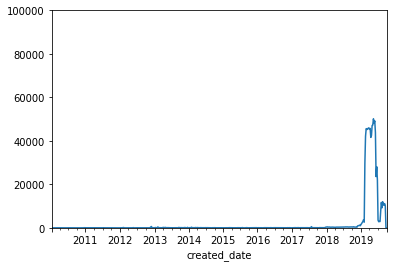

In [12]:
# I chose the .resample because I want to plot the complaint data over every single week of the dataset
df.resample("W", on="created_date").size().sort_index().plot(ylim=(0,100000))

## What time of day (by hour) is the least common for 311 complains? The most common?


In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [13]:
# I used .dt because I wanted to know the number of complaints by the hour of the day, not individual hours per day in the df
df.created_date.dt.hour.value_counts().sort_values(ascending=False)

10    72823
11    71500
9     69377
12    66077
14    64919
13    62437
15    61023
16    54615
8     51184
17    46215
18    42707
21    42292
22    41916
19    41075
20    41063
23    35658
0     33834
7     29784
1     18409
6     17038
2     11190
5      9042
3      8415
4      7407
Name: created_date, dtype: int64

### Make a graph of the results

* Make sure the hours are in the correct order
* Be sure to set the y-axis to start at 0
* Give your plot a descriptive title

<AxesSubplot:>

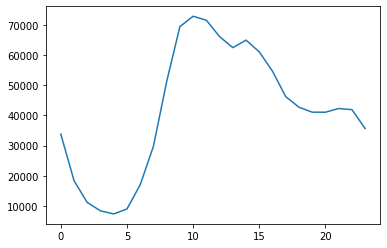

In [14]:
df.created_date.dt.hour.value_counts().sort_index().plot()

# Agencies

## What agencies field the most complaints in the dataset? Get the top 5.

Use the `agency` column for this one.

In [15]:
df.agency.value_counts().head()

NYPD    261669
HPD     217064
DSNY    158866
DOT     124911
DOB     111584
Name: agency, dtype: int64

## What are each of those agencies?

Define the following five acronyms:

* NYPD
* HPD
* DOT
* DSNY
* DEP

In [16]:
df[df.agency == 'DEP'].head()
# NYPD is 'New York Police Department'
# HPD is 'Department of Housing Preservation and Development'
# DOT is Department of Transportation
# DSNY is Department of Sanitation
# DEP is Department of Environmental Protection

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type
9,41694432,2019-02-13 12:37:00,2019-02-14 12:00:00,DEP,Department of Environmental Protection,Noise,Noise: Jack Hammering (NC2),NaN,10018,17 WEST 38 STREET,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE
14,41694437,2019-02-13 09:44:00,2019-02-15 14:00:00,DEP,Department of Environmental Protection,Sewer,Catch Basin Clogged/Flooding (Use Comments) (SC),NaN,11419,94-11 108 STREET,ADDRESS,South Richmond Hill,Closed,QUEENS,PHONE
16,41694439,2019-02-13 22:10:00,2019-02-14 09:42:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11249,NaN,INTERSECTION,BROOKLYN,Closed,BROOKLYN,ONLINE
17,41694440,2019-02-13 21:04:00,2019-02-15 18:00:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10016,NaN,INTERSECTION,NEW YORK,Closed,MANHATTAN,ONLINE
18,41694442,2019-02-13 21:05:00,2019-02-15 12:30:00,DEP,Department of Environmental Protection,Air Quality,"Air: Smoke, Chimney or vent (AS1)",NaN,10036,511 WEST 46 STREET,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE


## What is the most common complaint to HPD?

In [ ]:
# Why did you pick these columns to calculate the answer?

In [17]:
# I used the 'agency' column because it has the agency acronym that I could filter to get the types of complaint
df[df.agency == 'HPD'].complaint_type.value_counts()

HEAT/HOT WATER          64948
UNSANITARY CONDITION    34737
PAINT/PLASTER           22921
PLUMBING                21782
DOOR/WINDOW             15316
WATER LEAK              14558
GENERAL                 11225
ELECTRIC                10185
FLOORING/STAIRS          9877
APPLIANCE                5846
SAFETY                   4569
ELEVATOR                  689
OUTSIDE BUILDING          411
Name: complaint_type, dtype: int64

## What are the top 3 complaints to each agency?

You'll want to use the weird confusing `.groupby(level=...` thing we learned when reviewing the homework.

In [18]:
df.groupby(['agency'])['complaint_type'].agg(lambda x:x.value_counts().index[0:3])

agency
ACS                                                                                                 Forms
COIB                                                                                                Forms
DCA                                                                                    Consumer Complaint
DCAS                                                                                 [Question, Comments]
DCP                                                                                    Research Questions
DEP                                                                          [Noise, Water System, Sewer]
DFTA                              [Housing - Low Income Senior, Housing Options, Senior Center Complaint]
DHS                                                                            Homeless Person Assistance
DOB                                           [General Construction/Plumbing, Elevator, BEST/Site Safety]
DOE                                    

## What is the most common kind of residential noise complaint?

The NYPD seems to deal with a lot of noise complaints at homes. What is the most common subtype?

In [ ]:
# Why did you pick these columns to calculate the answer?

In [ ]:
# df.head()

In [67]:
# I used the .location_type column to look for residential buildings as I assumed that's where residential complaints would be
# df[df.location_type == 'RESIDENTIAL BUILDING'].complaint_type.value_counts()
residential = df[df.location_type == 'RESIDENTIAL BUILDING']
residential[df.complaint_type.str.contains("Noise", case=False)].value_counts()

/var/folders/4r/qbtxk1s968n5kqwsz68bgc4c0000gn/T/ipykernel_20880/3377439400.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  residential[df.complaint_type.str.contains("Noise", case=False)].value_counts()


Series([], dtype: int64)

## What time of day do "Loud Music/Party" complaints come in? Make it a chart!

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [22]:
# Why does dt not work here?
# df[df.complaint_type.str.contains("Noise - Residential", na=False)].dt.hour.size()
# IM NOT SURE WHY .dt DOESNT WORK HERE
df[df.complaint_type.str.contains("Noise - Residential", na=False)].resample("H", on="created_date").size()

created_date
2010-06-26 02:00:00     6
2010-06-26 03:00:00     6
2010-06-26 04:00:00     3
2010-06-26 05:00:00     1
2010-06-26 06:00:00     1
                       ..
2019-06-21 19:00:00    20
2019-06-21 20:00:00    37
2019-06-21 21:00:00    70
2019-06-21 22:00:00    61
2019-06-21 23:00:00     9
Freq: H, Length: 78790, dtype: int64

<AxesSubplot:xlabel='created_date'>

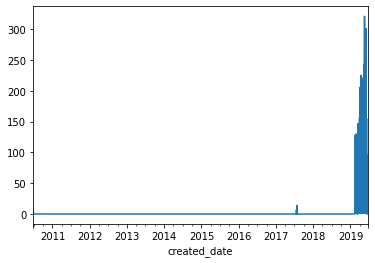

In [23]:
df[df.complaint_type.str.contains("Noise - Residential", na=False)].resample("H", on="created_date").size().sort_index().plot()

## When do people party hard?

Make a monthly chart of Loud Music/Party complaints since the beginning of the dataset. Make it count them on a biweekly basis (every two weeks).

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [25]:
# I'm not sure why df doesn't work here
df[df.complaint_type.str.contains("Noise - Residential", na=False)].resample("H", on="created_date").size().sort_index()

created_date
2010-06-26 02:00:00     6
2010-06-26 03:00:00     6
2010-06-26 04:00:00     3
2010-06-26 05:00:00     1
2010-06-26 06:00:00     1
                       ..
2019-06-21 19:00:00    20
2019-06-21 20:00:00    37
2019-06-21 21:00:00    70
2019-06-21 22:00:00    61
2019-06-21 23:00:00     9
Freq: H, Length: 78790, dtype: int64

## People and their bees

Sometimes people complain about bees! Why they'd do that, I have no idea. It's somewhere in "complaint_type" – can you find all of the bee-related complaints?

In [24]:
bees = df[df.complaint_type.str.contains("bee", case=False)] # WHERE ARE THE BEES?!
bees

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type
288065,42054326,2019-03-26 19:10:34,2019-04-05 15:00:55,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11103.0,24-19 42 STREET,ADDRESS,ASTORIA,Closed,QUEENS,PHONE
291446,42058804,2019-03-26 18:14:03,2019-04-05 15:02:00,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11104.0,42-19 42 STREET,ADDRESS,SUNNYSIDE,Closed,QUEENS,PHONE
372834,42163934,2019-04-08 18:26:04,2019-04-29 11:18:17,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,10302,57 HOOKER PLACE,ADDRESS,STATEN ISLAND,Closed,STATEN ISLAND,PHONE
378505,42171504,2019-04-08 15:50:40,2019-04-29 11:11:42,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Mixed Use Building,11214,2060 78 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE
391645,42189666,2019-04-10 19:28:14,2019-04-29 11:17:09,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,10469,1462 STICKNEY PLACE,ADDRESS,BRONX,Closed,BRONX,PHONE
466469,42291921,2019-04-23 11:39:59,2019-05-06 09:36:28,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,11210,674 EAST 22 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
472431,42300656,2019-04-23 14:56:21,2019-05-06 09:37:30,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,3+ Family Apartment Building,10037,2311 5 AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE
506112,42497797,2019-04-28 15:33:33,2019-05-13 11:10:45,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11385,2017 HARMAN STREET,ADDRESS,RIDGEWOOD,Closed,QUEENS,ONLINE
532844,42533095,2019-05-02 13:13:47,2019-05-13 11:10:47,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,11419,107-14 125 STREET,ADDRESS,SOUTH RICHMOND HILL,Closed,QUEENS,ONLINE
547427,42549720,2019-05-02 12:45:50,2019-05-13 11:10:46,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,10309,62 SHARROTTS ROAD,ADDRESS,STATEN ISLAND,Closed,STATEN ISLAND,PHONE


### What month do most of the complaints happen in? I'd like to see a graph.

In [26]:
df[df.complaint_type.str.contains("bee", case=False)].resample("M", on="created_date").size()

created_date
2019-03-31    2
2019-04-30    6
2019-05-31    8
Freq: M, dtype: int64

<AxesSubplot:xlabel='created_date'>

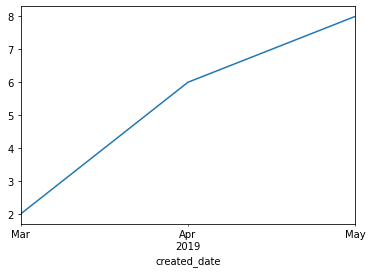

In [27]:
df[df.complaint_type.str.contains("bee", case=False)].resample("M", on="created_date").size().plot()

### Are the people getting in trouble usually beekeepers or not beekeepers?

In [28]:
bees['descriptor'].value_counts()

Bees/Wasps - Not a beekeper    9
Beekeeping - Honeybees         7
Name: descriptor, dtype: int64

# Math with datetimes

## How long does it normally take to resolve a 311 complaint?

Even if we didn't cover this in class, I have faith that you can guess how to calculate it.

In [29]:
df['time_to_fix']=df['closed_date']-df['created_date']

In [30]:
df['time_to_fix'].median() # median worked better than mean, outliers?

Timedelta('1 days 07:19:00')

Save it as a new column called `time_to_fix`

## Which agency has the best time-to-fix time?

In [31]:
df.groupby('agency')['time_to_fix'].median().sort_values()

agency
DHS             0 days 01:13:03
NYPD            0 days 02:32:49
DOT             0 days 20:21:17
DEP             0 days 22:00:00
DSNY            2 days 09:22:00
DPR             2 days 20:15:50
DOHMH           3 days 04:39:48
DCA      3 days 13:29:47.500000
DOE      4 days 01:09:43.500000
HPD             6 days 02:25:28
DOB      7 days 13:06:31.500000
DOF     10 days 23:11:08.500000
DFTA    12 days 05:36:54.500000
DOITT          14 days 14:11:52
EDC            19 days 00:41:53
TLC            45 days 06:49:03
ACS                         NaT
COIB                        NaT
DCAS                        NaT
DCP                         NaT
DVS                         NaT
TAX                         NaT
Name: time_to_fix, dtype: timedelta64[ns]

## Maybe we need some more information...

I might want to know how big our sample size is for each of those, maybe the high performers only have one or two instances of having requests filed!

### First, try using `.describe()` on the time to fix column after your `groupby`.

In [32]:
df.groupby('agency')['time_to_fix'].median().sort_values().describe()

count                            16
mean         8 days 08:34:11.781250
std      11 days 08:01:16.185791372
min                 0 days 01:13:03
25%                 2 days 00:31:30
50%          3 days 19:19:45.500000
75%                11 days 06:47:35
max                45 days 06:49:03
Name: time_to_fix, dtype: object

### Now, an alternative

Seems a little busy, yeah? **You can also do smaller, custom aggregations.**

Try something like this:

```python
# Multiple aggregations of one column
df.groupby('agency').time_to_fix.agg(['median', 'size'])

# You can also do something like this to reach multiple columns
df.groupby('agency').agg({
    'time_to_fix': ['median', 'size']
})
```

In [33]:
df.groupby('agency').time_to_fix.agg(['median', 'size'])

,median,size
agency,,
ACS,NaT,117
COIB,NaT,4
DCA,3 days 13:29:47.500000,4230
DCAS,NaT,280
DCP,NaT,9
DEP,0 days 22:00:00,88316
DFTA,12 days 05:36:54.500000,2286
DHS,0 days 01:13:03,482
DOB,7 days 13:06:31.500000,111584


In [34]:
df.groupby('agency').agg({
    'time_to_fix': ['median', 'size']
})

time_to_fix        
                        median    size
agency                                
ACS                        NaT     117
COIB                       NaT       4
DCA     3 days 13:29:47.500000    4230
DCAS                       NaT     280
DCP                        NaT       9
DEP            0 days 22:00:00   88316
DFTA   12 days 05:36:54.500000    2286
DHS            0 days 01:13:03     482
DOB     7 days 13:06:31.500000  111584
DOE     4 days 01:09:43.500000     330
DOF    10 days 23:11:08.500000    2370
DOHMH          3 days 04:39:48   10581
DOITT         14 days 14:11:52     151
DOT            0 days 20:21:17  124911
DPR            2 days 20:15:50   13343
DSNY           2 days 09:22:00  158866
DVS                        NaT     120
EDC           19 days 00:41:53     148
HPD            6 days 02:25:28  217064
NYPD           0 days 02:32:49  261669
TAX                        NaT      86
TLC           45 days 06:49:03    3053

## Seems weird that NYPD time-to-close is so fast. Can we break that down by complaint type?

Remember the order: 

1. Filter
2. Group
3. Grab a column
4. Do something with it
5. Sort

In [ ]:
# Need to do

## Back to median fix time for all agencies: do these values change based on the borough?

First, use `groupby` to get the median time to fix per agency in each borough. You can use something like `pd.set_option("display.max_rows", 200)` if you can't see all of the results by default!

In [35]:
df.groupby(['agency', 'borough']).time_to_fix.agg(['median', 'size'])

median  size
agency borough                                   
ACS    Unspecified                      NaT   117
COIB   Unspecified                      NaT     4
DCA    BRONX                3 days 21:27:41   630
       BROOKLYN      3 days 01:30:53.500000  1164
       MANHATTAN            2 days 19:41:54  1075
...                                     ...   ...
TLC    BROOKLYN            42 days 04:27:41   520
       MANHATTAN           48 days 04:23:43  1707
       QUEENS              38 days 14:30:56   572
       STATEN ISLAND       46 days 01:32:50    18
       Unspecified         20 days 14:09:33    22

[96 rows x 2 columns]

### Or, use another technique!

We talked about pivot table for a hot second in class, but it's (potentially) a good fit for this situation:

```python
df.pivot_table(
    columns='what will show up as your columns',
    index='what will show up as your rows',
    values='the column that will show up in each cell',
    aggfunc='the calculation(s) you want dont'
)
```

In [36]:
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,time_to_fix
0,41694420,2019-01-27 19:26:21,2019-02-13 10:53:25,HPD,Department of Housing Preservation and Development,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,16 days 15:27:04
1,41694421,2019-01-29 11:06:56,2019-02-13 02:07:22,HPD,Department of Housing Preservation and Development,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE,14 days 15:00:26
2,41694422,2019-02-13 12:28:18,2019-03-15 09:54:50,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE,29 days 21:26:32
3,41694423,2019-02-13 15:40:19,2019-02-20 06:18:35,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE,6 days 14:38:16
4,41694424,2019-02-13 13:18:31,2019-02-20 05:36:54,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,6 days 16:18:23


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype          
---  ------                  --------------    -----          
 0   unique_key              1000000 non-null  int64          
 1   created_date            1000000 non-null  datetime64[ns] 
 2   closed_date             996296 non-null   datetime64[ns] 
 3   agency                  1000000 non-null  object         
 4   agency_name             1000000 non-null  object         
 5   complaint_type          1000000 non-null  object         
 6   descriptor              995955 non-null   object         
 7   location_type           698311 non-null   object         
 8   incident_zip            975646 non-null   object         
 9   incident_address        876798 non-null   object         
 10  address_type            996949 non-null   object         
 11  city                    975730 non-null   object         
 12  s

In [38]:
df.time_to_fix.describe()

count                        996296
mean     12 days 14:16:38.741382079
std      87 days 10:07:24.957361688
min              -54 days +00:00:00
25%                 0 days 02:50:45
50%                 1 days 07:19:00
75%                 6 days 01:36:22
max              4246 days 16:20:15
Name: time_to_fix, dtype: object

In [39]:
df.pivot_table(
    columns='borough',
    index='agency',
    values='time_to_fix',
    aggfunc='median'
) # IDK what's going on here

borough
agency
ACS
COIB
DCA
DCAS
DCP
DEP
DFTA
DHS
DOB


### Use the pivot table result to find the worst-performing agency in the Bronx, then compare with Staten Island

Since it's a dataframe, you can use the power of `.sort_values` (twice!). Do any of the agencies have a large difference between the two?

In [40]:
# Because my pivot table didn't work, I just used the .groupby
df_borough_performance = df.groupby(['agency', 'borough']).time_to_fix.agg(['median']).reset_index()

In [41]:
# df_borough_performance.sort_values(by='borough')
# df_borough_performance
df_borough_performance[df_borough_performance.borough == 'BRONX'].sort_values('median', ascending=False)

,agency,borough,median
90,TLC,BRONX,46 days 18:05:43.500000
73,EDC,BRONX,29 days 09:57:57
49,DOITT,BRONX,14 days 15:53:27
16,DFTA,BRONX,12 days 20:10:47
38,DOF,BRONX,12 days 01:57:07
27,DOB,BRONX,11 days 09:22:11.500000
78,HPD,BRONX,6 days 19:47:50
60,DPR,BRONX,4 days 14:20:20
2,DCA,BRONX,3 days 21:27:41
32,DOE,BRONX,3 days 03:06:35


In [42]:
df_borough_performance[df_borough_performance.borough == 'STATEN ISLAND'].sort_values('median', ascending=False)

,agency,borough,median
94,TLC,STATEN ISLAND,46 days 01:32:50
77,EDC,STATEN ISLAND,17 days 22:38:35.500000
53,DOITT,STATEN ISLAND,17 days 21:47:06
20,DFTA,STATEN ISLAND,13 days 01:16:46.500000
82,HPD,STATEN ISLAND,11 days 21:28:18
42,DOF,STATEN ISLAND,10 days 23:03:23
36,DOE,STATEN ISLAND,7 days 04:36:43
47,DOHMH,STATEN ISLAND,6 days 00:00:00
6,DCA,STATEN ISLAND,3 days 16:30:03
64,DPR,STATEN ISLAND,2 days 04:34:40


## What were the top ten 311 types of complaints on Thanksgiving 2020? Are they different than the day before Thanksgiving?

**Finding exact dates is awful, honestly.** While you can do something like this to ask for rows after a specific date:

```python
df[df.date_column >= '2020-01-01']
```

You, for some reason, can't ask for an **exact match** unless you're really looking for exactly at midnight. For example, this won't give you what you want:

```python
df[df.date_column == '2020-01-01']
```

Instead, the thing you need to do is this:

```python
df[(df.date_column >= '2020-01-01') & (df.date_column < '2020-01-02']
```

Everything that starts at midnight on the 1st but *is still less than midnight on the 2nd**.

In [43]:
df[(df.created_date >= '2020-11-26') & (df.created_date < '2020-11-27')].complaint_type.value_counts()
df[(df.created_date >= '2020-11-25') & (df.created_date < '2020-11-26')].complaint_type.value_counts()

Series([], Name: complaint_type, dtype: int64)

## What is the most common 311 complaint types on Christmas day?

And I mean *all Christmas days*, not just in certain years)

* Tip: `dt.` and `&` are going to be your friend here
* Tip: If you want to get fancy you can look up `strftime`
* Tip: One of those is much much faster than the other

In [44]:
month_day = df.created_date.dt.strftime('%m/%d')
month_day.value_counts().head()

02/25    8052
06/03    7992
05/20    7954
02/26    7736
05/22    7710
Name: created_date, dtype: int64

In [45]:
df[(month_day >= '12/25') & (month_day < '12/26')].complaint_type.value_counts()

Elevator                         35
UNSANITARY CONDITION              9
WATER LEAK                        9
General Construction/Plumbing     6
ELECTRIC                          5
PAINT/PLASTER                     5
PLUMBING                          5
GENERAL                           2
DOOR/WINDOW                       2
Building/Use                      1
Name: complaint_type, dtype: int64

# Stories

Let's approach this from the idea of **having stories and wanting to investigate them.** Fun facts:

* Not all of these are reasonably answered with what our data is
* We only have certain skills about how to analyzing the data
* There are about six hundred approaches for each question

But: **for most of these prompts there are at least a few ways you can get something interesting out of the dataset.**

## Fireworks and BLM

You're writing a story about the anecdotal idea that the summer of the BLM protests there were an incredible number of fireworks being set off. Does the data support this?

What assumptions is your analysis making? What could make your analysis fall apart?

In [ ]:
# What I want to do here is look for issues with fireworks during the height of the BLM protests
# I'm making the assumption that the complaint type would be with fireworks and not with loud noise because thats too vague

In [64]:
# df[df.complaint_type.str.contains("firework", case=False)]
blm_protest = df[(df.created_date >= '2020-05-26') & (df.created_date < '2020-09-01')]
blm_protest[blm_protest.complaint_type == 'Illegal Fireworks'].value_counts()

Series([], dtype: int64)

## Sanitation and work slowdowns

The Dept of Sanitation recently had a work slowdown to protest the vaccine mandate. You'd like to write about past work slowdowns that have caused garbage to pile up in the street, streets to not be swept, etc, and compare them to the current slowdown. You've also heard rumors that it was worse in Staten Island and a few Brooklyn neighborhoods - Marine Park and Canarsie - than everywhere else.

Use the data to find timeframes worth researching, and note how this slowdown might compare. Also, is there anything behind the geographic issue?

What assumptions is your analysis making? What could make your analysis fall apart?

## Gentrification and whining to the government

It's said that when a neighborhood gentrifies, the people who move in are quick to report things to authorities that would previously have been ignored or dealt with on a personal basis. Use the data to investigate the concept (two techniques for finding gentrifying area are using census data and using Google).

What assumptions is your analysis making? What could make your analysis fall apart? Be sure to cite your sources. 

## 311 quirks

Our editor tried to submit a 311 request using the app the other day, but it didn't go through. As we all know, news is what happens to your editor! Has the 311 mobile app ever actually stopped working?

If that's a dead end, maybe you can talk about the differences between the different submission avenues: could a mobile outage disproportionately impact a certain kind of complaint or agency? How about if the phone lines stopped working?

What assumptions is your analysis making? What could make your analysis fall apart?

In [ ]:
# I think what I would check is if there are any outliers in the middle of the data when there are no 311 calls

## NYCHA and public funds

NYC's public housing infrastructure is failing, and one reason is lack of federal funds. While the recent spending bills passed through Congress might be able to help, the feeling is that things have really fallen apart in the past however-many years – as time goes on it gets more and more difficult for the agency in control of things to address issues in a timely manner.

If you were tasked with finding information to help a reporter writing on this topic, you will **not** reasonably be able to find much in the dataset to support or refute this. Why not? 

If you wanted to squeeze something out of this dataset anyway, what could an option be? (You might need to bring in another dataset.)